In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.0


## Scenario for performing some computation

```python

import syft as sy

domain_client = sy.login("....")

dataset = domain_client.datasets[0]

a = dataset.assets["A"]

b = dataset.assets["B"]

c = a + b

d = domain_client.api.numpy.array([1, 2, 3])

e = c * d

# Inplace operation, mutated the value of d
d.astype('int32')

# Another mutation of d
d[0] = 10

f = d + 48
```

<br>
<br>

**Corresponding Actions Generated**

```

action1 -> a + b

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d[0] = 10

action6 -> d + 48

```

### Initialize the action graph service with verify key

In [2]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

In [4]:
G = graph_store.graph.db

### Create some dummy data

In [5]:
labels_dict = {}

In [6]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [7]:
labels_dict[action_obj_a.id] = "A"
labels_dict[action_obj_b.id] = "B"

In [8]:
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=action_obj_a)

```python
class NodeActionData:
  id: str = 4eeed3b5409845859a75729838a2a283
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:07
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [9]:
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=action_obj_b)

```python
class NodeActionData:
  id: str = 535ee20342484bcab1ca884770e2418e
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:08
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [10]:
pprint(labels_dict)

{<UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B'}


### Action1 -> A + B = C

In [11]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = 0c87d6e512f24ea48ac15b5b827ade3c
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 4eeed3b5409845859a75729838a2a283
  args: str = [<LineageID: 535ee20342484bcab1ca884770e2418e - 919183343539757048>]
  kwargs: str = {}
  result_id: str = 373330147f3448a294500380bb241f77

```

In [12]:
labels_dict[action1.id] = "+"
labels_dict[action1.result_id.id] = "C"

In [13]:
action_graph_service.add_action(context=authed_context, action=action1)

(class NodeActionData:
   id: str = 0c87d6e512f24ea48ac15b5b827ade3c
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:12
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = 373330147f3448a294500380bb241f77
   type: str = NodeType.ACTION_OBJECT
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:12
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None)

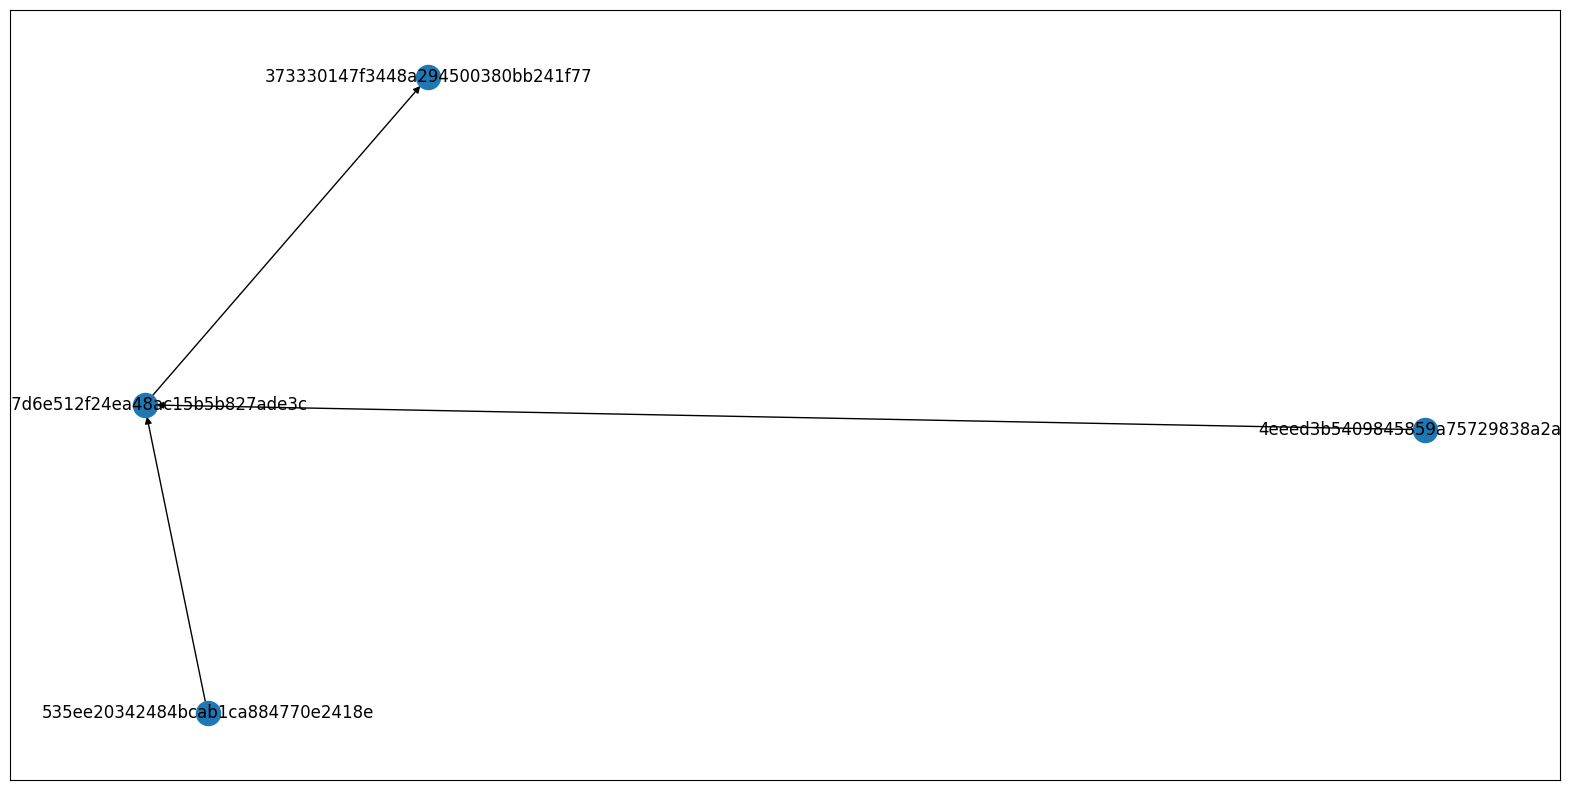

In [14]:
action_graph_service.store.graph.visualize()

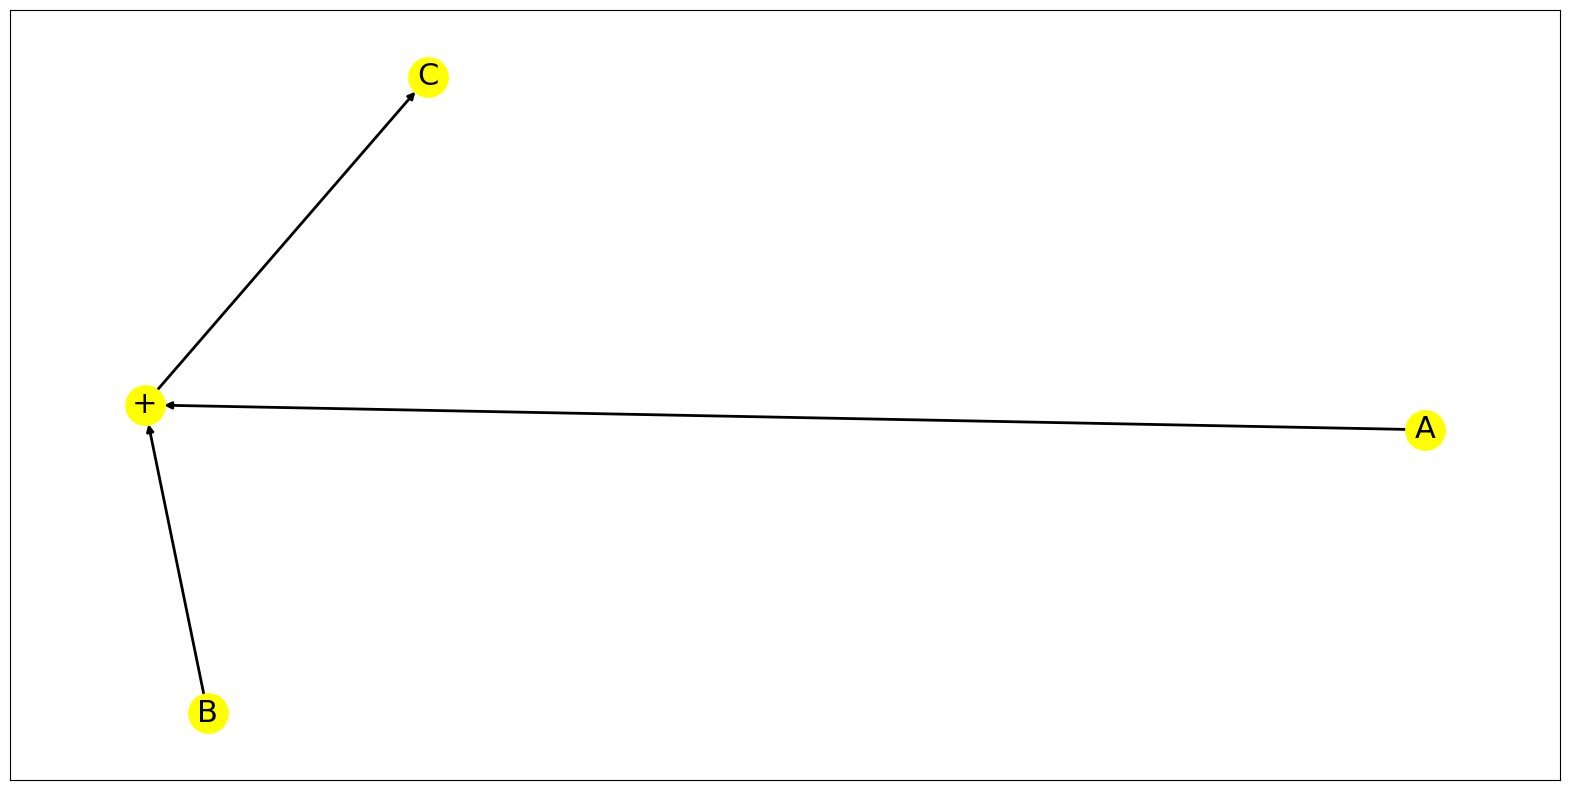

In [15]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [16]:
pprint(labels_dict)

{<UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B'}


### Action2 -> np.array([1, 2, 3]) = D

In [17]:
action_obj_d = ActionObject.from_obj([1, 2, 3])

In [18]:
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

In [19]:
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=action_obj_d)

```python
class NodeActionData:
  id: str = 38669bae88b54c40a8818c2a82554248
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:20
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [20]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = 4836886725c04736915a628c382d98d0
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 38669bae88b54c40a8818c2a82554248 - 843978110859715675>]
  kwargs: str = {}
  result_id: str = e09b423d1a584f928fe3043f08580cd9

```

In [21]:
labels_dict[action2.id] = "np.array"
labels_dict[action2.result_id.id] = "D"

In [22]:
# Save action to graph
action_graph_service.add_action(context=authed_context, action=action2)

(class NodeActionData:
   id: str = 4836886725c04736915a628c382d98d0
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:23
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = e09b423d1a584f928fe3043f08580cd9
   type: str = NodeType.ACTION_OBJECT
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:23
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None)

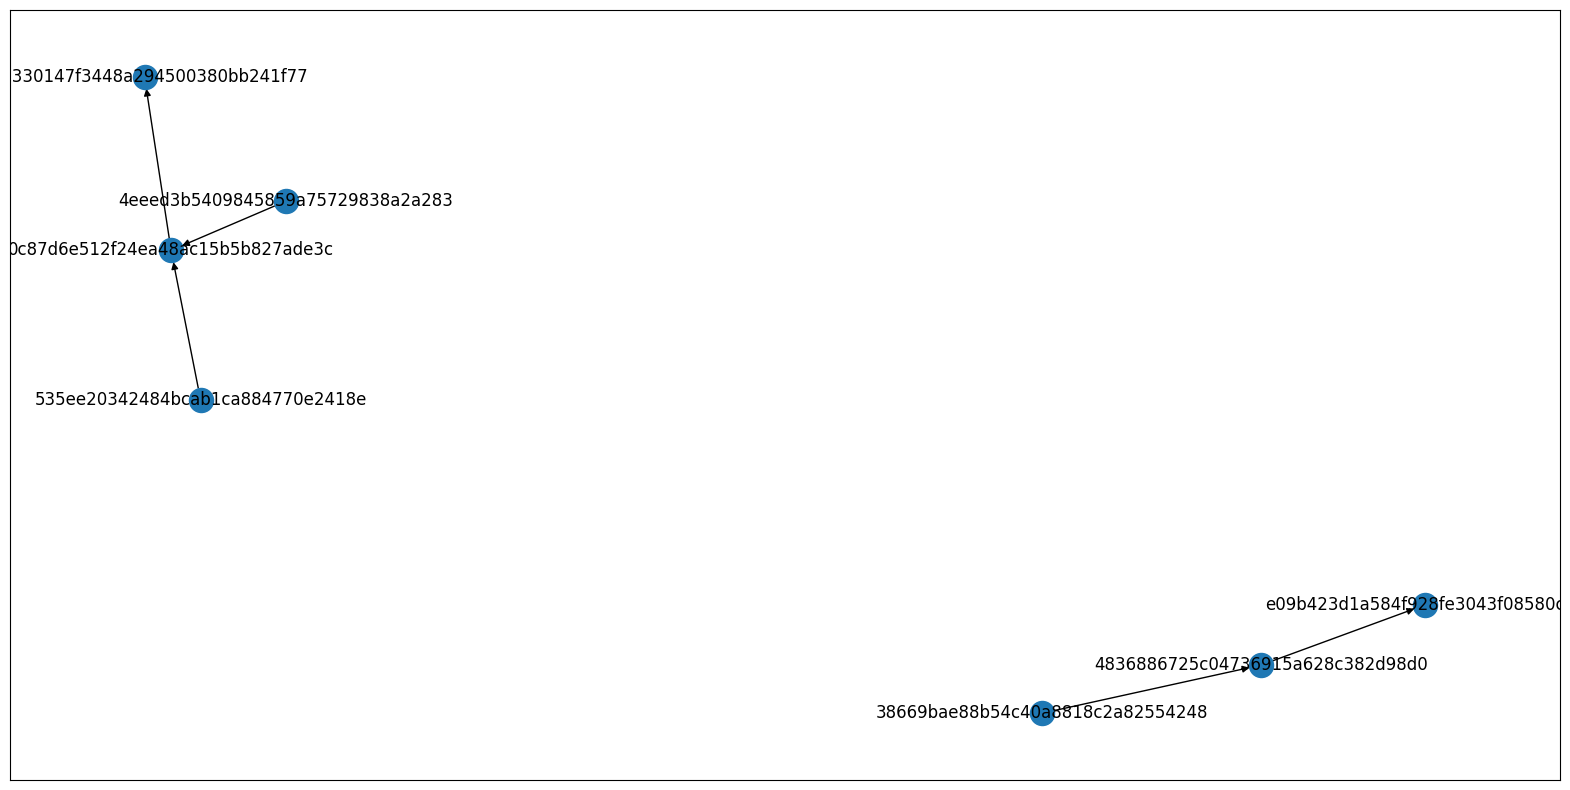

In [23]:
action_graph_service.store.graph.visualize()

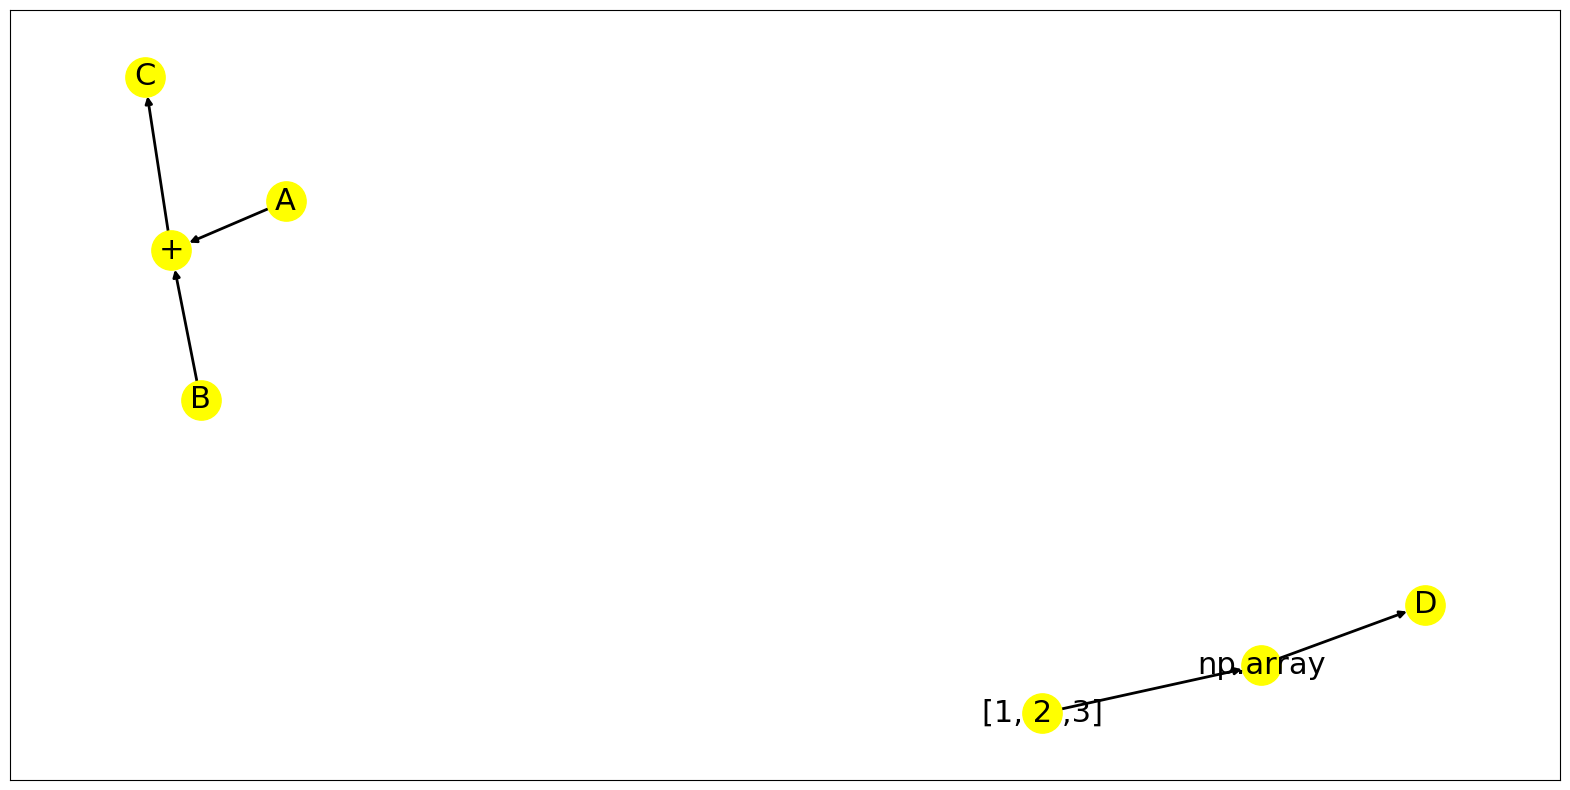

In [24]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [25]:
pprint(labels_dict)

{<UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 38669bae88b54c40a8818c2a82554248>: '[1, 2 ,3]',
 <UID: 4836886725c04736915a628c382d98d0>: 'np.array',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B',
 <UID: e09b423d1a584f928fe3043f08580cd9>: 'D'}


In [26]:
action2_result_node = G.nodes(data=True)[action2.result_id.id]["data"]
action2_result_node

```python
class NodeActionData:
  id: str = e09b423d1a584f928fe3043f08580cd9
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

Now, `action2_result_node`'s `is_mutated` should be `False`

### Action3 -> C*D = E

In [27]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action3

```python
class Action:
  id: str = db470f77057f4eb7bbd981c6d9e6b6cb
  path: str = "action.execute"
  op: str = "__mul__"
  remote_self: str = 373330147f3448a294500380bb241f77
  args: str = [<LineageID: e09b423d1a584f928fe3043f08580cd9 - 1494375011792357797>]
  kwargs: str = {}
  result_id: str = 91254279f63d4a20b2368b64c78b64a3

```

In [28]:
action_graph_service.add_action(context=authed_context, action=action3)

(class NodeActionData:
   id: str = db470f77057f4eb7bbd981c6d9e6b6cb
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:50
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = 91254279f63d4a20b2368b64c78b64a3
   type: str = NodeType.ACTION_OBJECT
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:50
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None)

In [29]:
labels_dict[action3.id] = "*"
labels_dict[action3.result_id.id] = "E"

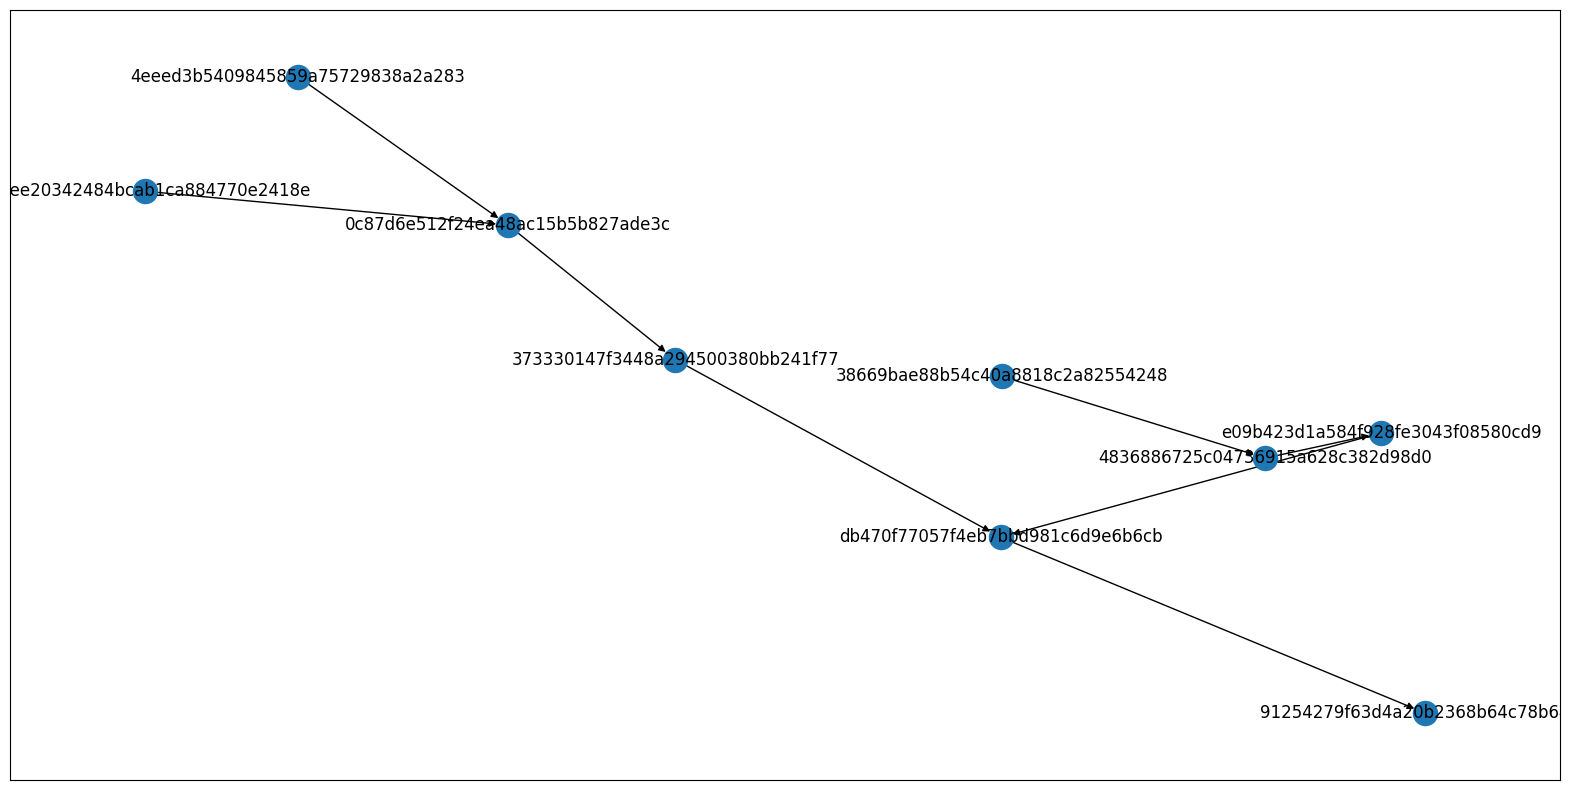

In [30]:
action_graph_service.store.graph.visualize()

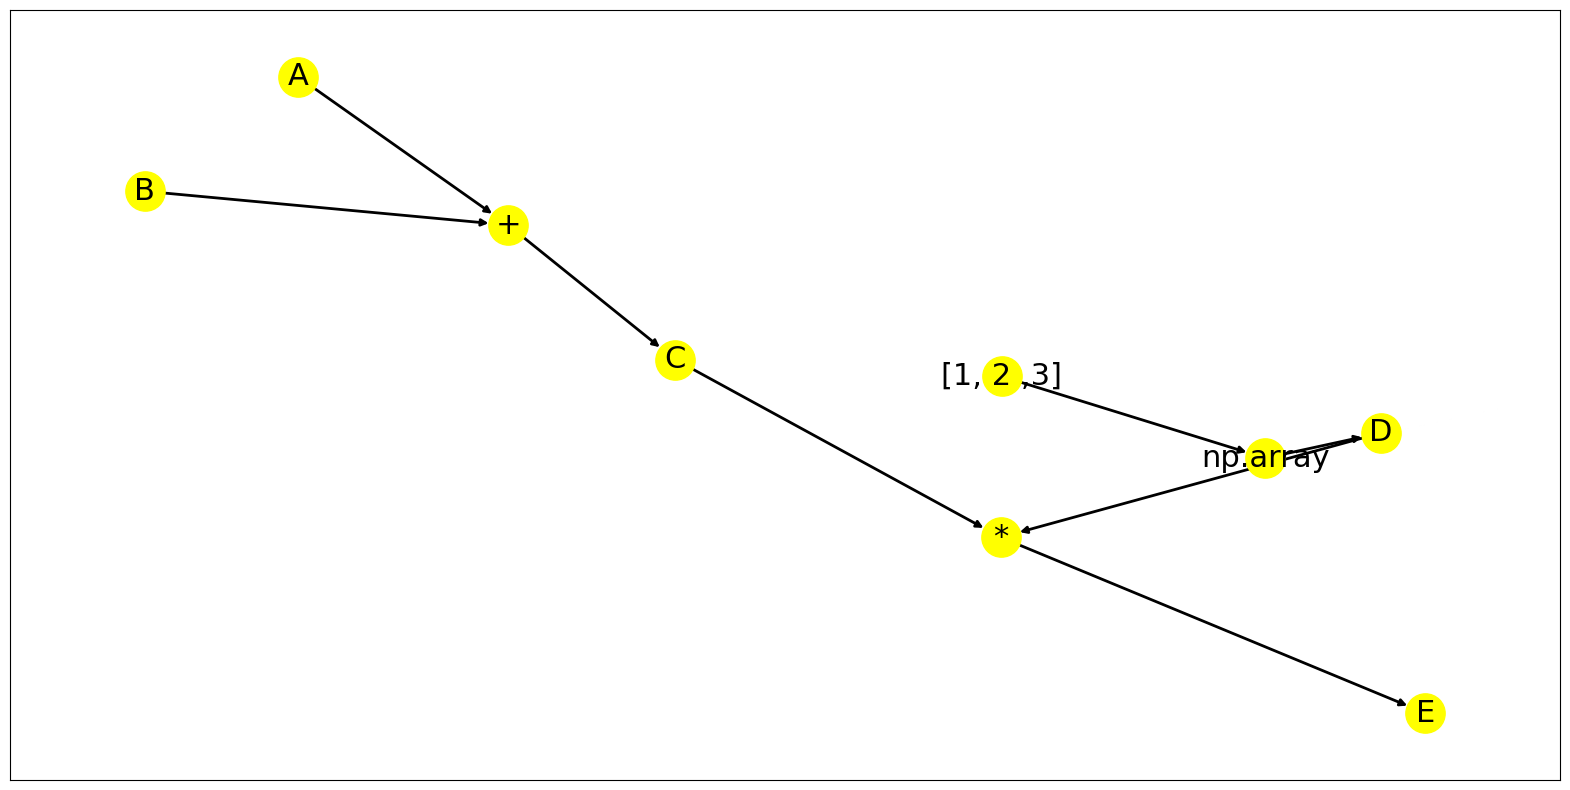

In [31]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx(G, pos=pos, labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [32]:
pprint(labels_dict)

{<UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 38669bae88b54c40a8818c2a82554248>: '[1, 2 ,3]',
 <UID: 4836886725c04736915a628c382d98d0>: 'np.array',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B',
 <UID: 91254279f63d4a20b2368b64c78b64a3>: 'E',
 <UID: db470f77057f4eb7bbd981c6d9e6b6cb>: '*',
 <UID: e09b423d1a584f928fe3043f08580cd9>: 'D'}


### Action4 -> np.int32(D) = D (Mutate D's type) 

In [33]:
as_type_action_obj = ActionObject.from_obj('np.int32')

In [34]:
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=as_type_action_obj)

```python
class NodeActionData:
  id: str = 5407a6d326dd46b0b6096226ffca6414
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:37:17
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [35]:
labels_dict[as_type_action_obj.id] = "np.int32"

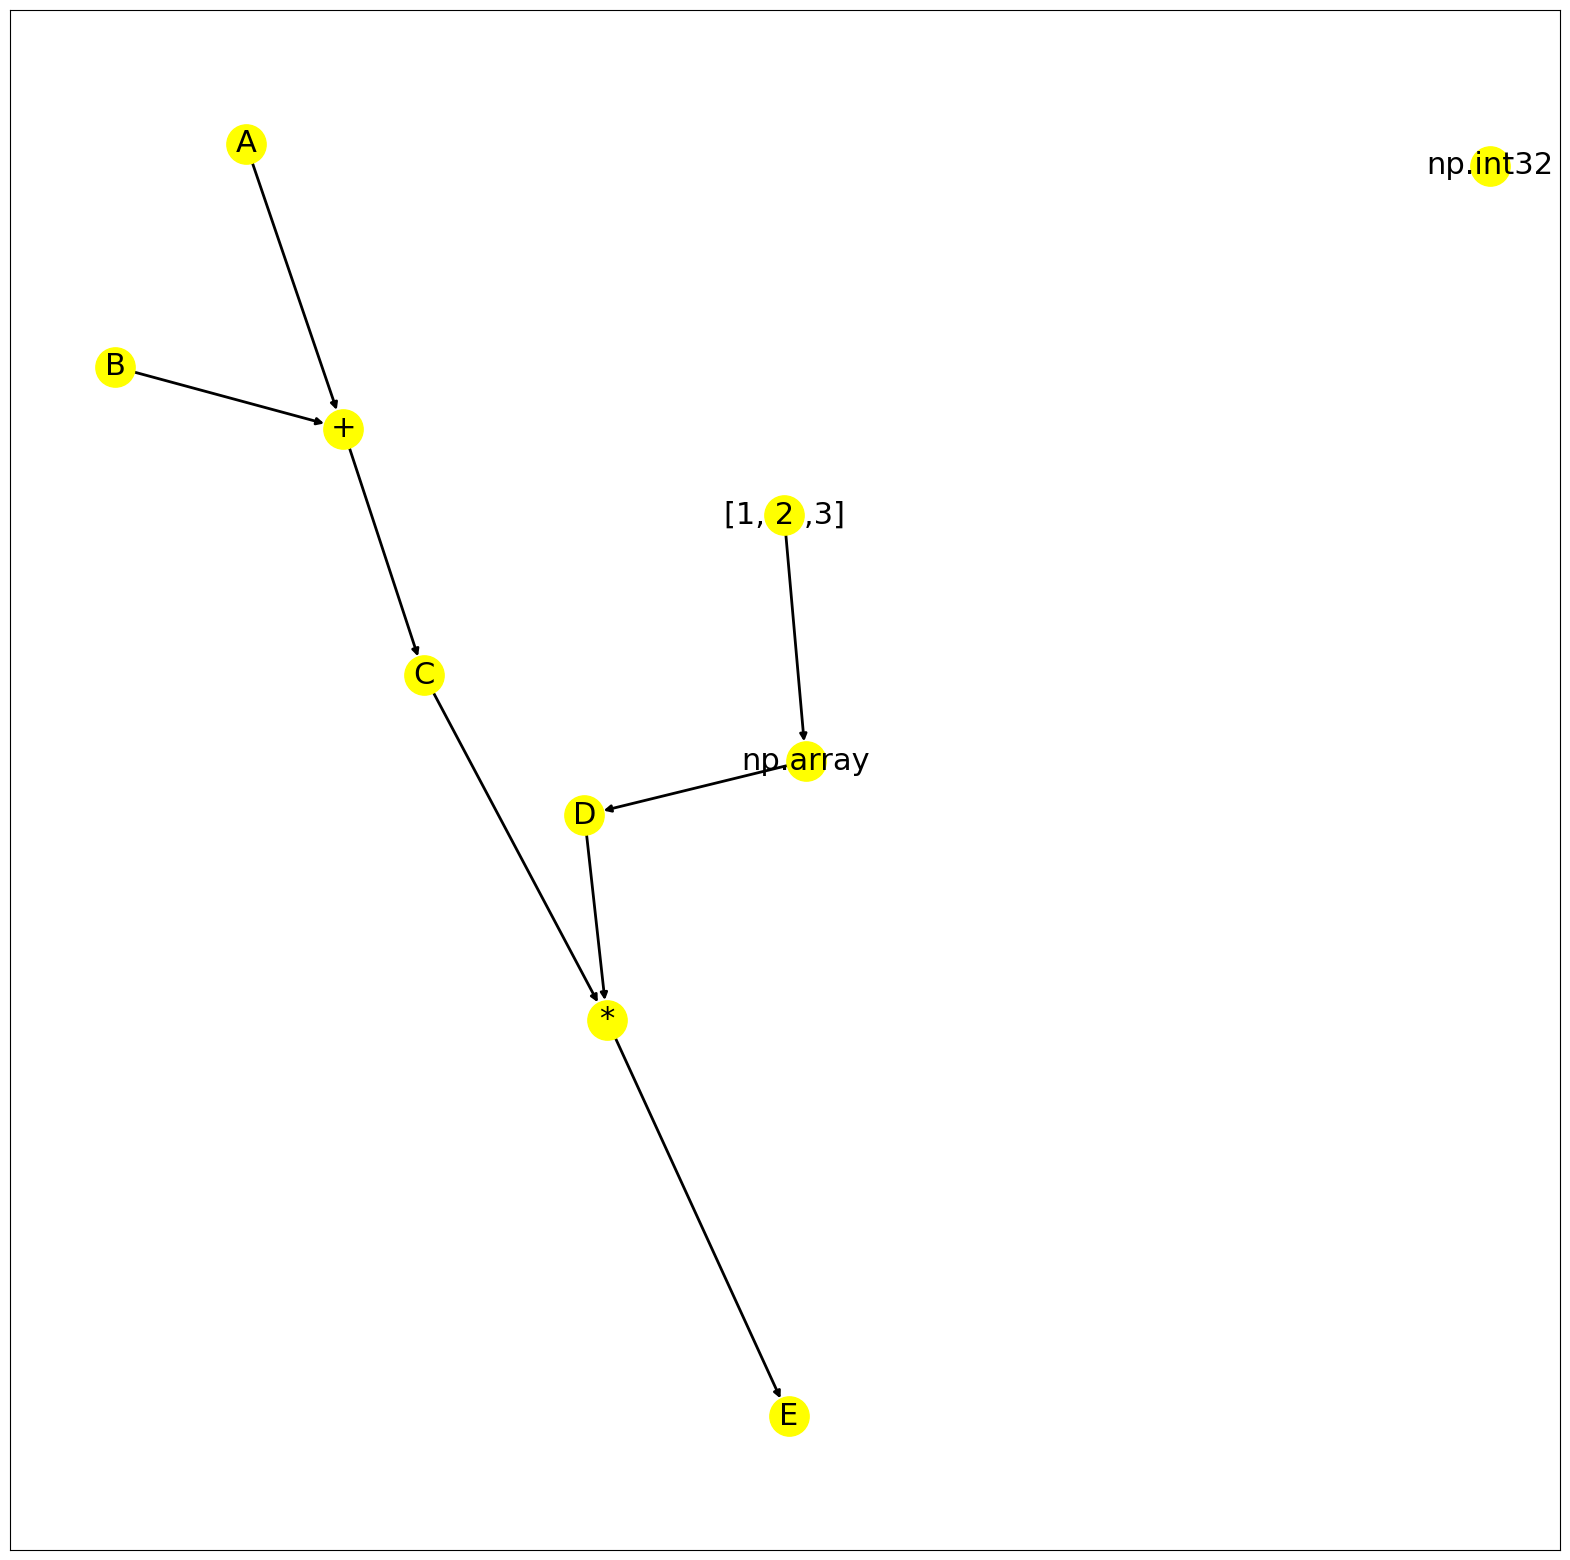

In [36]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [37]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)

In [38]:
action_graph_service.add_action(context=authed_context, action=action4)

(class NodeActionData:
   id: str = 101b05befced42e189450363e1607087
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:37:24
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = True
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = None
   type: str = NodeType.ACTION_OBJECT
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:36:23
   updated_at: str = 2023-05-04 03:37:24
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = True
   is_mutagen: str = False
   next_mutagen_node: str = 101b05befced42e189450363e1607087
   last_nm_mutagen_node: str = 101b05befced42e189450363e1607087)

In [39]:
labels_dict[action4.id] = "astype"

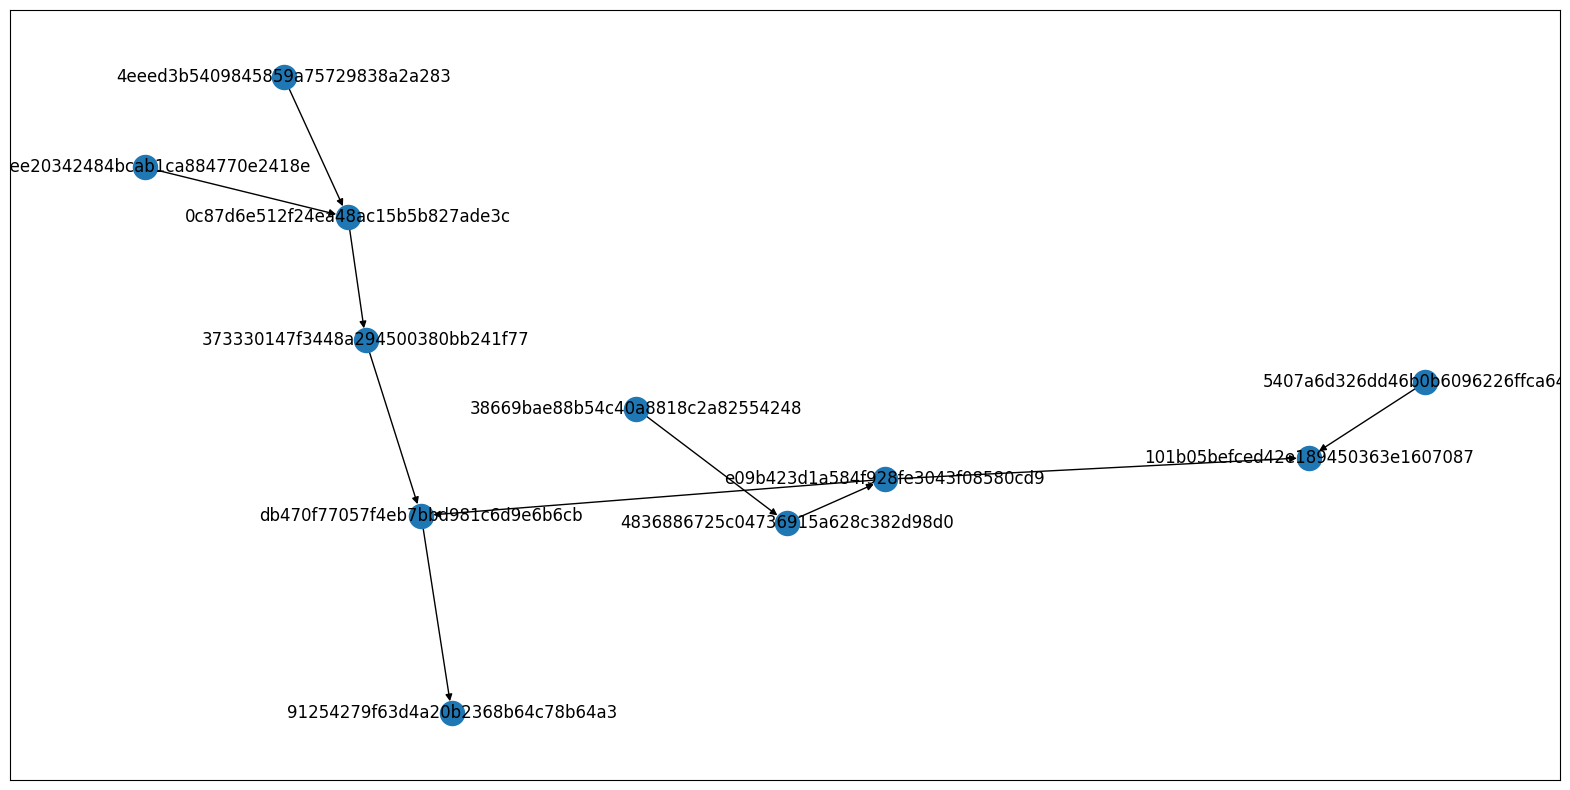

In [40]:
action_graph_service.store.graph.visualize()

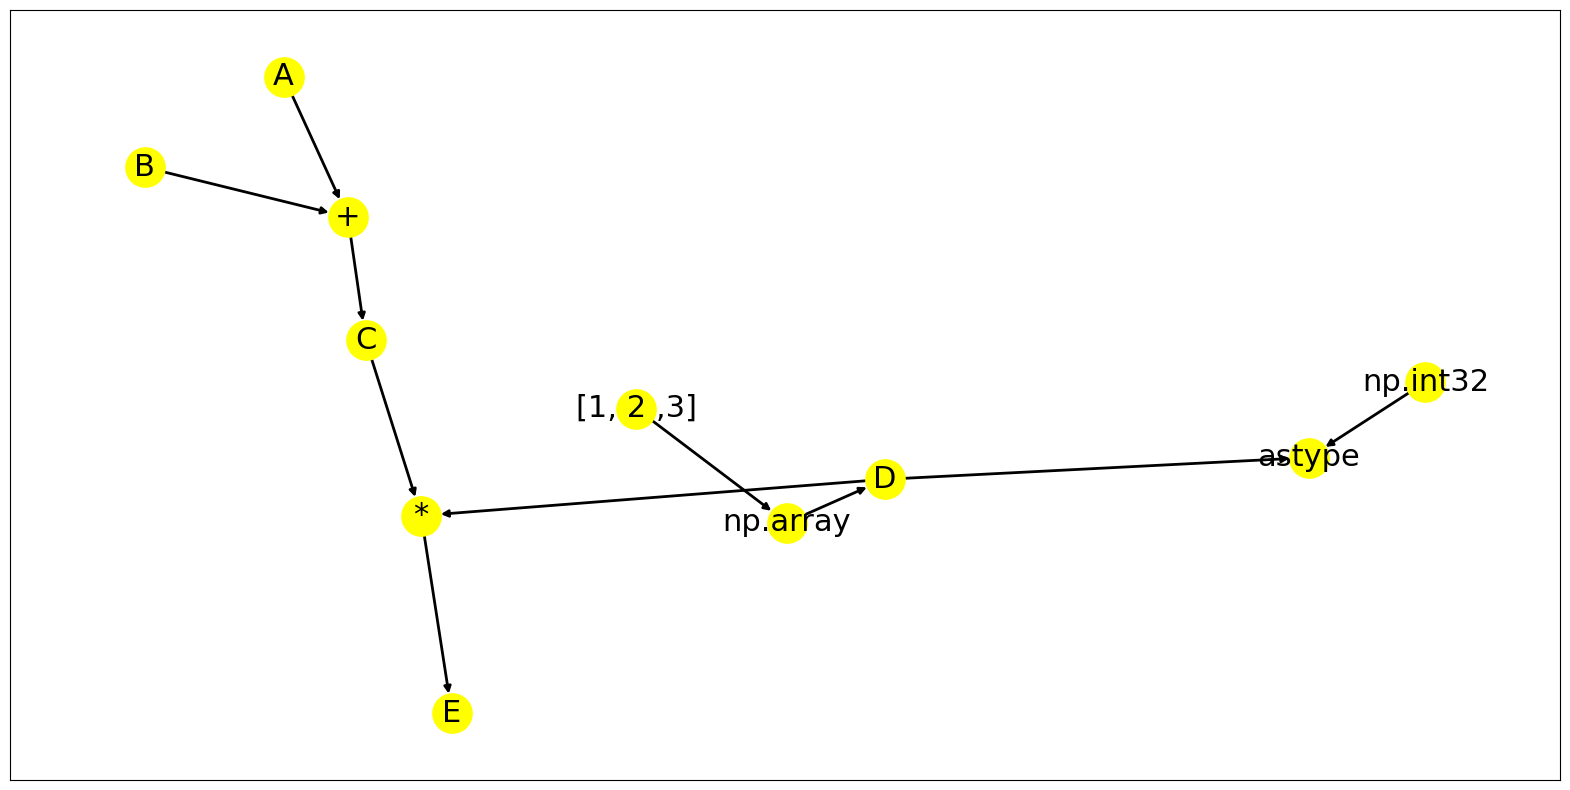

In [41]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx(G, pos=pos, labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [42]:
pprint(labels_dict)

{<UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 101b05befced42e189450363e1607087>: 'astype',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 38669bae88b54c40a8818c2a82554248>: '[1, 2 ,3]',
 <UID: 4836886725c04736915a628c382d98d0>: 'np.array',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B',
 <UID: 5407a6d326dd46b0b6096226ffca6414>: 'np.int32',
 <UID: 91254279f63d4a20b2368b64c78b64a3>: 'E',
 <UID: db470f77057f4eb7bbd981c6d9e6b6cb>: '*',
 <UID: e09b423d1a584f928fe3043f08580cd9>: 'D'}


In [43]:
G.nodes(data=True)[action2.result_id.id]["data"]

```python
class NodeActionData:
  id: str = None
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = 2023-05-04 03:37:24
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 101b05befced42e189450363e1607087
  last_nm_mutagen_node: str = 101b05befced42e189450363e1607087

```

In [44]:
mid = G.nodes(data=True)[action2.result_id.id]["data"]['next_mutagen_node']
mid

<UID: 101b05befced42e189450363e1607087>

In [45]:
labels_dict[mid]

'astype'

In [46]:
mid == action4.id

True

So, `next_mutagen_node` of `action2.result_id.id` (`mid`) is the `astype` node

In [47]:
G.nodes(data=True)[action2.result_id.id]['data']

```python
class NodeActionData:
  id: str = None
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = 2023-05-04 03:37:24
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 101b05befced42e189450363e1607087
  last_nm_mutagen_node: str = 101b05befced42e189450363e1607087

```

In [48]:
G.nodes(data=True)[action2.id]['data']

```python
class NodeActionData:
  id: str = 4836886725c04736915a628c382d98d0
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [49]:
G.nodes(data=True)[action4.id]['data']

```python
class NodeActionData:
  id: str = 101b05befced42e189450363e1607087
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:37:24
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [83]:
G.nodes(data=True)[action4.result_id.id]['data']

```python
class NodeActionData:
  id: str = None
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = 2023-05-04 03:37:49
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 101b05befced42e189450363e1607087
  last_nm_mutagen_node: str = 72f24df1388f47abaa8b59cfe91250c9

```

In [50]:
action2.result_id.id == action4.result_id.id

True

In [51]:
labels_dict[action4.result_id.id]

'D'

### Action5 -> D[0] = 10

In [52]:
idx_action_obj = ActionObject.from_obj(0)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=idx_action_obj)

```python
class NodeActionData:
  id: str = 31b618408370427ab1ffd92ef0c98023
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:37:48
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [53]:
labels_dict[idx_action_obj.id] = "index=0"

In [54]:
item_val_action_obj = ActionObject.from_obj(10)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=item_val_action_obj)

```python
class NodeActionData:
  id: str = bb50e396e357426b8bf224633ea66b2d
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:37:48
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [55]:
labels_dict[item_val_action_obj.id] = "value=10"

In [56]:
action5 = Action(
    path="action.execute",
    op="__setitem__",
    remote_self=action2.result_id,
    args=[idx_action_obj.syft_lineage_id, 
          item_val_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action5

```python
class Action:
  id: str = 72f24df1388f47abaa8b59cfe91250c9
  path: str = "action.execute"
  op: str = "__setitem__"
  remote_self: str = e09b423d1a584f928fe3043f08580cd9
  args: str = [<LineageID: 31b618408370427ab1ffd92ef0c98023 - 2283495654628758532>, <LineageID: bb50e396e357426b8bf224633ea66b2d - 466475617834008248>]
  kwargs: str = {}
  result_id: str = e09b423d1a584f928fe3043f08580cd9

```

In [57]:
action5.remote_self.id

<UID: e09b423d1a584f928fe3043f08580cd9>

In [58]:
action_graph_service.add_action(context=authed_context, action=action5)

(class NodeActionData:
   id: str = 72f24df1388f47abaa8b59cfe91250c9
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:37:49
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = True
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = None
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:37:24
   updated_at: str = 2023-05-04 03:37:49
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = True
   is_mutagen: str = True
   next_mutagen_node: str = 72f24df1388f47abaa8b59cfe91250c9
   last_nm_mutagen_node: str = 72f24df1388f47abaa8b59cfe91250c9)

In [59]:
labels_dict[action5.id] = "__setitem__"

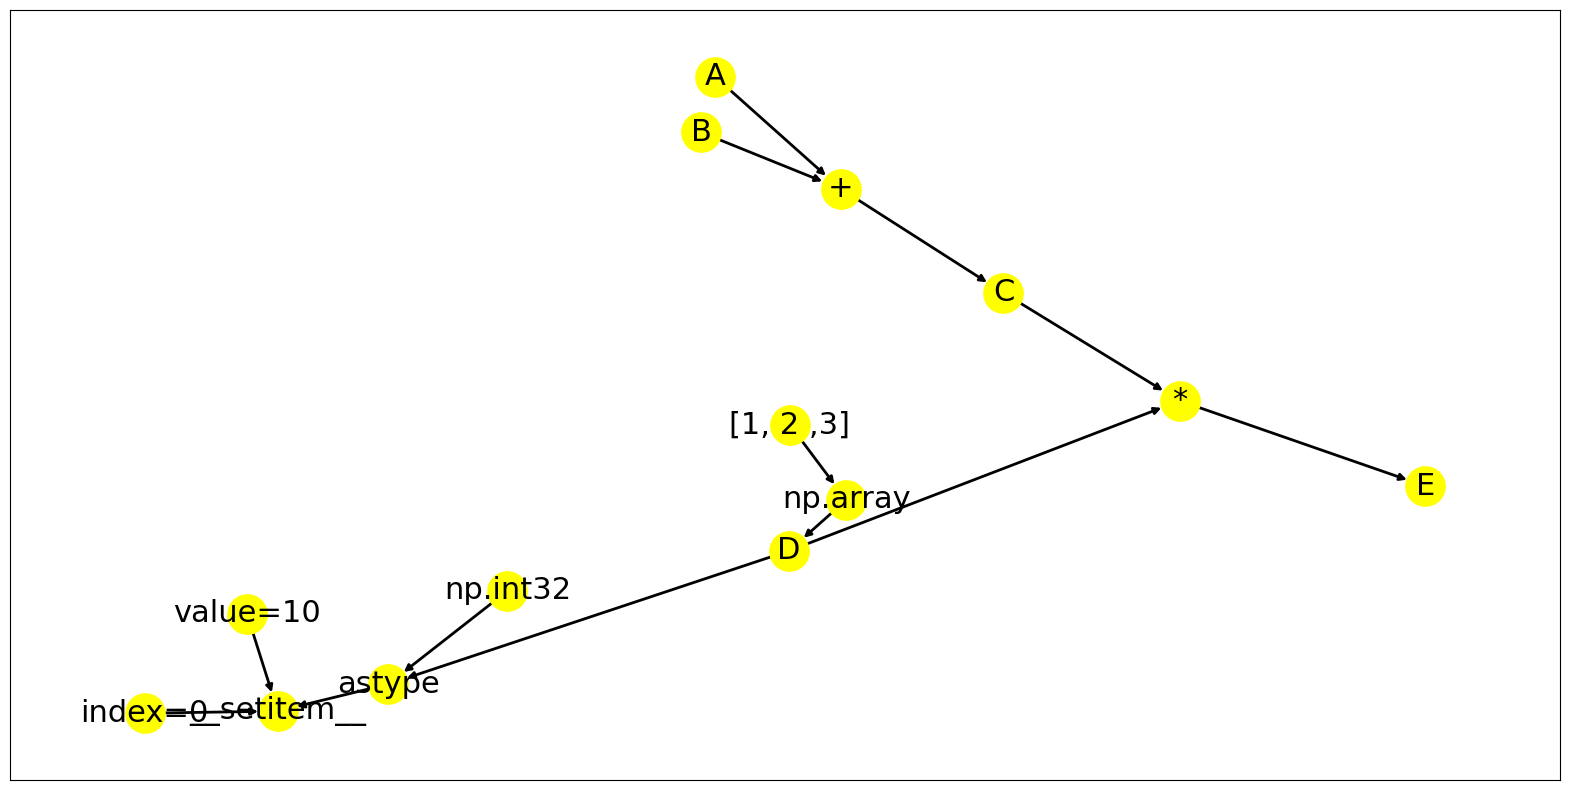

In [60]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, 
                 labels=labels_dict, with_labels=True, 
                 width=2.0, node_color="yellow", 
                 node_size=800, font_size=22)

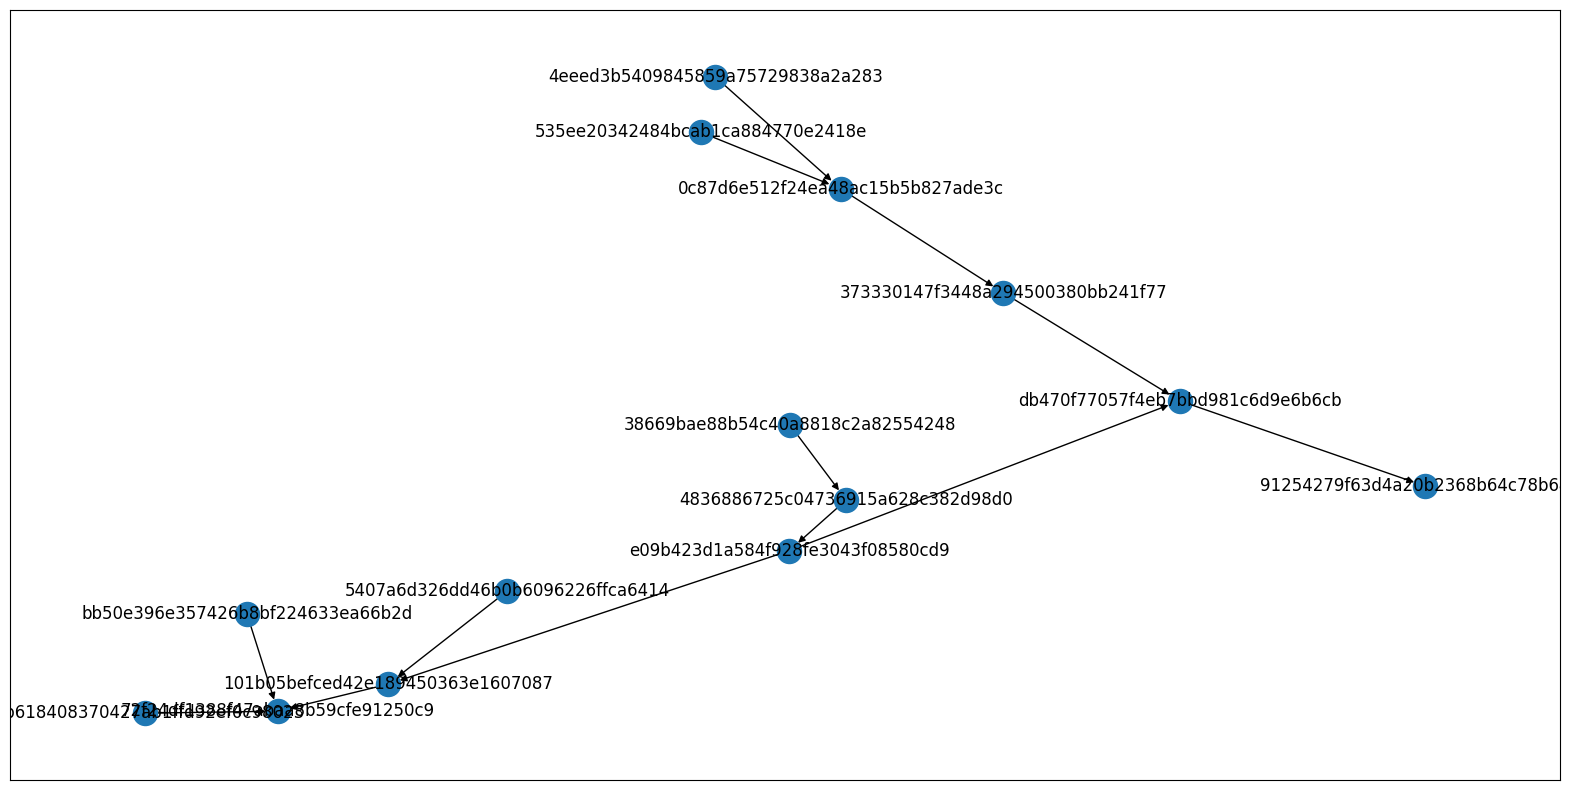

In [61]:
action_graph_service.store.graph.visualize()

In [62]:
pprint(labels_dict)

{<UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 101b05befced42e189450363e1607087>: 'astype',
 <UID: 31b618408370427ab1ffd92ef0c98023>: 'index=0',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 38669bae88b54c40a8818c2a82554248>: '[1, 2 ,3]',
 <UID: 4836886725c04736915a628c382d98d0>: 'np.array',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B',
 <UID: 5407a6d326dd46b0b6096226ffca6414>: 'np.int32',
 <UID: 72f24df1388f47abaa8b59cfe91250c9>: '__setitem__',
 <UID: 91254279f63d4a20b2368b64c78b64a3>: 'E',
 <UID: bb50e396e357426b8bf224633ea66b2d>: 'value=10',
 <UID: db470f77057f4eb7bbd981c6d9e6b6cb>: '*',
 <UID: e09b423d1a584f928fe3043f08580cd9>: 'D'}


In [63]:
action2.result_id.id == action4.result_id.id == action5.result_id.id

True

In [64]:
action5_node = G.nodes(data=True)[action5.id]["data"]
action5_node

```python
class NodeActionData:
  id: str = 72f24df1388f47abaa8b59cfe91250c9
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:37:49
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

Since `action5` is an action that causes mutation, its `is_mutagen=True`

In [65]:
action5_result_node = G.nodes(data=True)[action5.result_id.id]["data"]
action5_result_node

```python
class NodeActionData:
  id: str = None
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = 2023-05-04 03:37:49
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 101b05befced42e189450363e1607087
  last_nm_mutagen_node: str = 72f24df1388f47abaa8b59cfe91250c9

```

In [66]:
labels_dict[action5_result_node.next_mutagen_node]

'astype'

In [67]:
labels_dict[action5_result_node.last_nm_mutagen_node]

'__setitem__'

The result node of `action5` has `is_mutated` equals to true

In [68]:
action2_result_node = G.nodes(data=True)[action2.result_id.id]["data"]
action2_result_node

```python
class NodeActionData:
  id: str = None
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:36:23
  updated_at: str = 2023-05-04 03:37:49
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = True
  is_mutagen: str = False
  next_mutagen_node: str = 101b05befced42e189450363e1607087
  last_nm_mutagen_node: str = 72f24df1388f47abaa8b59cfe91250c9

```

### Action6 -> D + 48

In [69]:
arg_action_obj = ActionObject.from_obj(48)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=arg_action_obj)

```python
class NodeActionData:
  id: str = 83e9dc0ba57c4de3bc859d82254f9157
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:38:21
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [70]:
labels_dict[arg_action_obj.id] = "48"

In [71]:
action6 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action2.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action6

```python
class Action:
  id: str = 083ac90f452341788de0afb85a98dc31
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = e09b423d1a584f928fe3043f08580cd9
  args: str = [<LineageID: 83e9dc0ba57c4de3bc859d82254f9157 - 2005366132180123797>]
  kwargs: str = {}
  result_id: str = fcaa6f5e022144cdabade1987f34ca04

```

In [72]:
action_graph_service.add_action(context=authed_context, action=action6)

(class NodeActionData:
   id: str = 083ac90f452341788de0afb85a98dc31
   type: str = NodeType.ACTION
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:38:22
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None,
 class NodeActionData:
   id: str = fcaa6f5e022144cdabade1987f34ca04
   type: str = NodeType.ACTION_OBJECT
   status: str = ExecutionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-05-04 03:38:22
   updated_at: str = None
   user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
   is_mutated: str = False
   is_mutagen: str = False
   next_mutagen_node: str = None
   last_nm_mutagen_node: str = None)

In [73]:
labels_dict[action6.id] = "+"
labels_dict[action6.result_id.id] = "F"

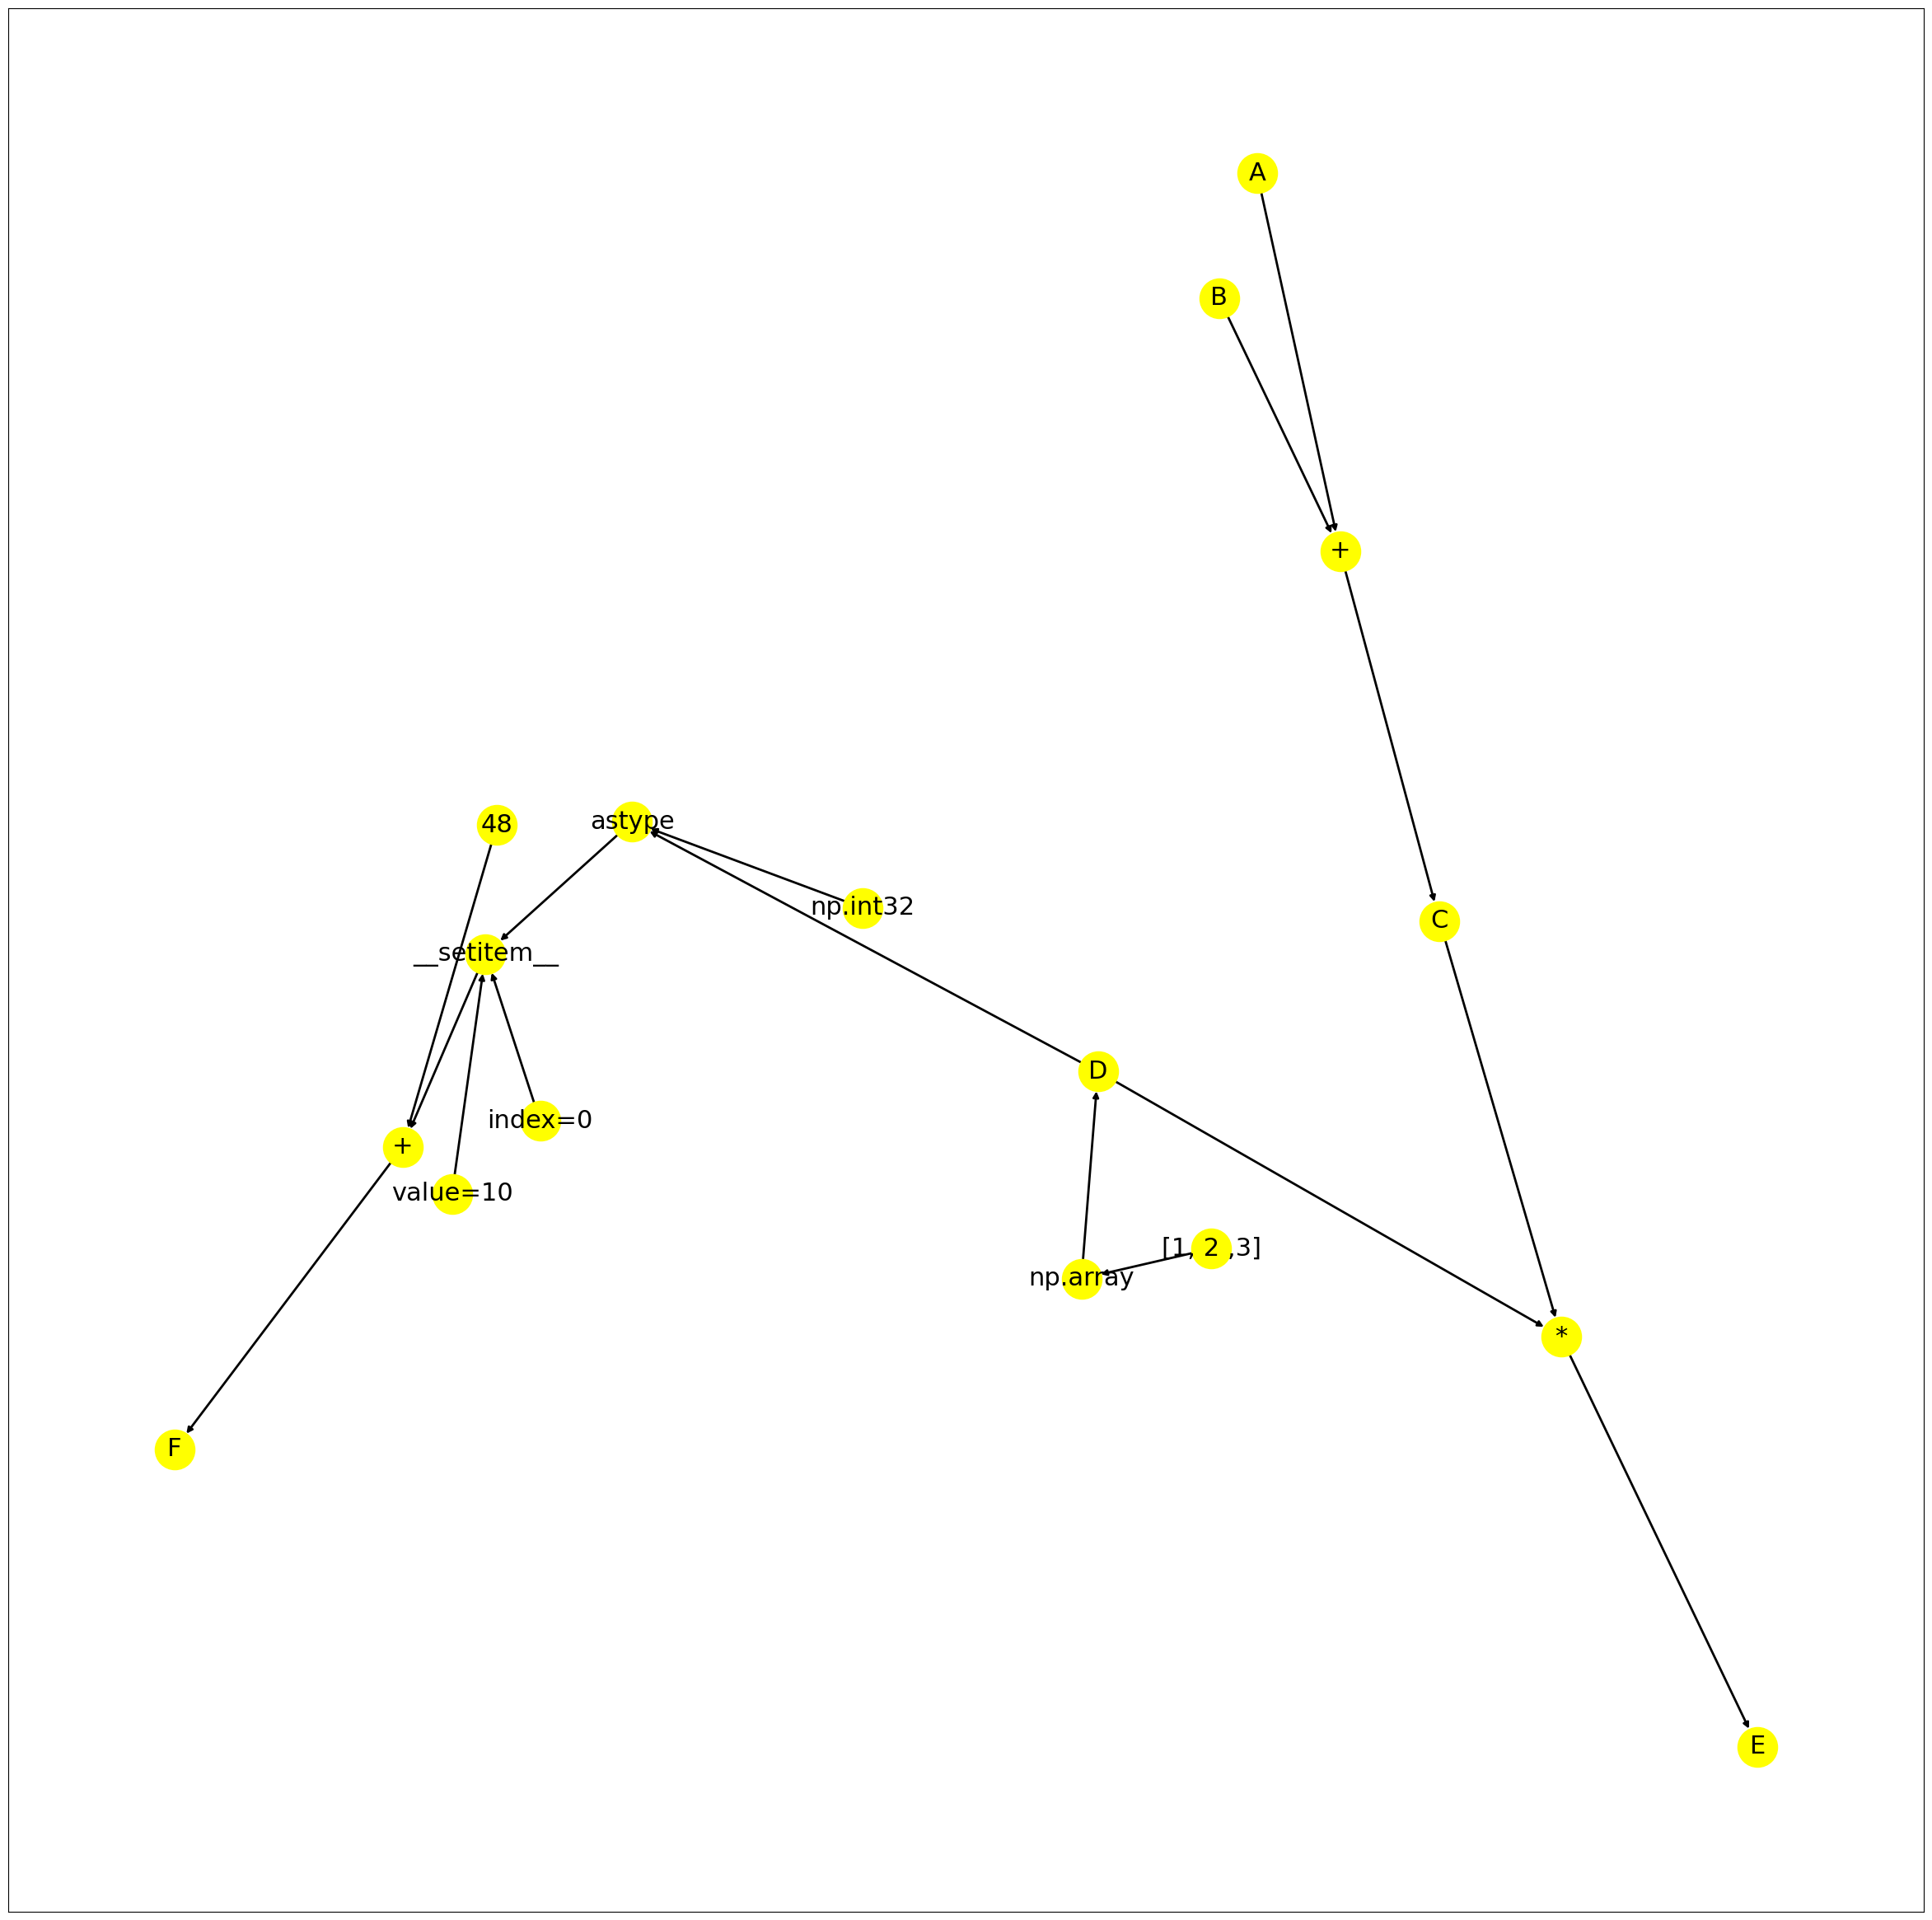

In [74]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx(G, pos=pos, 
                 labels=labels_dict, with_labels=True, 
                 width=2.0, node_color="yellow", 
                 node_size=1200, font_size=22)

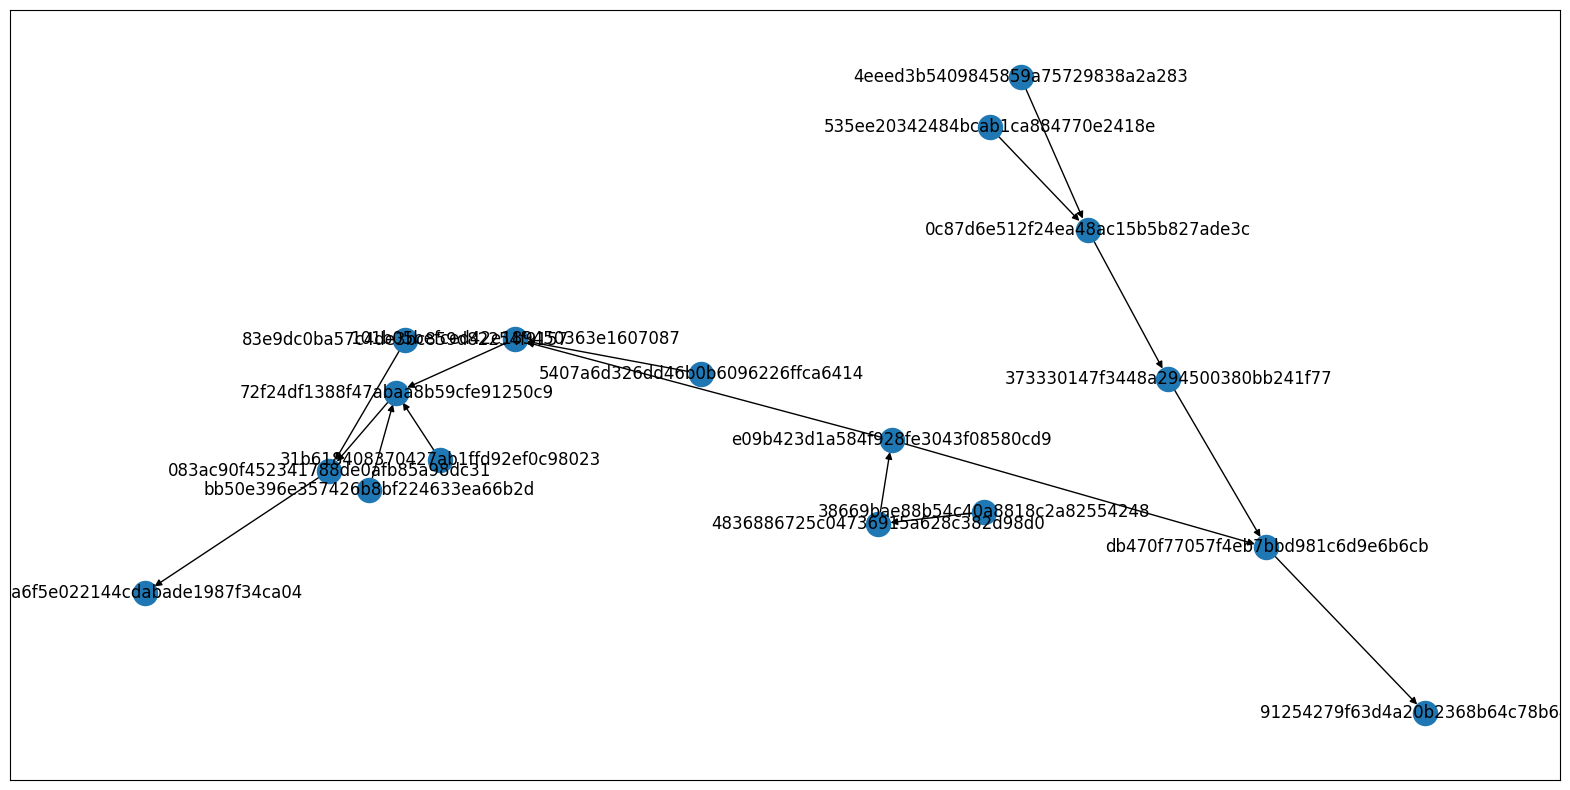

In [75]:
action_graph_service.store.graph.visualize()

In [76]:
pprint(labels_dict)

{<UID: 083ac90f452341788de0afb85a98dc31>: '+',
 <UID: 0c87d6e512f24ea48ac15b5b827ade3c>: '+',
 <UID: 101b05befced42e189450363e1607087>: 'astype',
 <UID: 31b618408370427ab1ffd92ef0c98023>: 'index=0',
 <UID: 373330147f3448a294500380bb241f77>: 'C',
 <UID: 38669bae88b54c40a8818c2a82554248>: '[1, 2 ,3]',
 <UID: 4836886725c04736915a628c382d98d0>: 'np.array',
 <UID: 4eeed3b5409845859a75729838a2a283>: 'A',
 <UID: 535ee20342484bcab1ca884770e2418e>: 'B',
 <UID: 5407a6d326dd46b0b6096226ffca6414>: 'np.int32',
 <UID: 72f24df1388f47abaa8b59cfe91250c9>: '__setitem__',
 <UID: 83e9dc0ba57c4de3bc859d82254f9157>: '48',
 <UID: 91254279f63d4a20b2368b64c78b64a3>: 'E',
 <UID: bb50e396e357426b8bf224633ea66b2d>: 'value=10',
 <UID: db470f77057f4eb7bbd981c6d9e6b6cb>: '*',
 <UID: e09b423d1a584f928fe3043f08580cd9>: 'D',
 <UID: fcaa6f5e022144cdabade1987f34ca04>: 'F'}


In [77]:
labels_dict[action6.result_id.id]

'F'

In [78]:
G.nodes(data=True)[action6.result_id.id]["data"]

```python
class NodeActionData:
  id: str = fcaa6f5e022144cdabade1987f34ca04
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-04 03:38:22
  updated_at: str = None
  user_verify_key: str = 889e359fe3d0156d4febeb2e193988bc46da4d6762c3228906b656812ca735e8
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

## Mutation

In [81]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [82]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

#### action1 -> initialization of variable `a`

In [83]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

#### action2 -> a.astype('int32') = b: mutation

In [84]:
as_type_action_obj = ActionObject.from_obj('np.int32')
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id  # pay attention here
)
action_graph_service.add_action(context=authed_context, action=action2)

#### action3 -> b.astype('float64') = c: mutation

In [85]:
as_type_action_obj = ActionObject.from_obj('np.float64')
action3 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action3)

#### action4 -> a.astype('complex128') = d: mutation

In [86]:
as_type_action_obj = ActionObject.from_obj('np.complex128')
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
action_graph_service.add_action(context=authed_context, action=action4)

In [87]:
action_graph_service.store.graph.visualize()

In [88]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")

In [89]:
node_action_data_1 = graph_store.get(uid=action1.id, credentials=verify_key).ok()
node_action_data_2 = graph_store.get(uid=action2.id, credentials=verify_key)
node_action_data_3 = graph_store.get(uid=action3.id, credentials=verify_key)
node_action_data_4 = graph_store.get(uid=action4.id, credentials=verify_key)

In [90]:
node_action_data_1

In [91]:
list(graph_store.graph.get_successors(node_action_data_1.id))